# 전국 지점별 기온 분석

## 1. 데이터 준비 및 확인
* 기상자료개방포털 https://data.kma.go.kr/cmmn/main.do

* 기상자료개방포털>데이터>기상관측>지상>종관기상관측

    [자료형태] 일자료

    [지점] 전체

    [자료] 기온>최저,최고,평균

    [기간] 1911~2010(10년단위로 나눠 다운로드)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

### 1.1 데이터프레임 생성

In [3]:
# 파일 목록 저장하기
file_list = os.listdir('./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/ASOS Data')
file_list
# 파일 경로 저장하기
data_scr = './drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/ASOS Data/'
data_scr

'./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/ASOS Data/'

In [5]:
# 데이터 가져와서 합치기
df = pd.DataFrame()
for i in file_list:
    file_src = data_scr+i
    data = pd.read_csv(file_src, encoding='cp949')
    df = pd.concat([df,data], ignore_index=True) # 인덱스 재지정
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5
...,...,...,...,...,...,...
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6


### 1.2. 데이터 확인

In [6]:
# 데이터 개수
df.shape

(1597076, 6)

In [7]:
# 지점명 목록
df['지점명'].unique()

array(['강릉', '서울', '인천', '대구', '전주', '부산', '목포', '제주', '울릉도', '추풍령', '광주',
       '포항', '울산', '여수', '속초', '춘천', '수원', '서산', '청주', '대전', '군산', '통영',
       '서귀포', '진주', '임실', '정읍', '대관령', '원주', '충주', '울진', '안동', '완도', '성산',
       '강화', '양평', '이천', '인제', '홍천', '삼척', '제천', '보은', '천안', '보령', '부여',
       '금산', '부안', '남원', '고창군', '주암', '장흥', '해남', '고흥', '성산포', '영주', '문경',
       '영덕', '의성', '구미', '영천', '거창', '합천', '밀양', '산청', '거제', '남해', '철원',
       '관악산', '창원', '고산', '태백', '장수', '봉화', '동두천', '백령도', '동해', '영월',
       '무안', '흑산도', '파주', '북강릉', '상주', '고창', '진도(첨찰산)', '정선군', '영광군',
       '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '의령군', '함양군', '청송군',
       '경주시', '북춘천', '순천', '대구(기)', '홍성', '세종', '광양시', '진도군'],
      dtype=object)

In [8]:
# 지점명 목록 개수
df['지점명'].nunique()

102

### 1.3. 데이터타입 확인/변경

In [9]:
# 데이터타입 확인

df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

In [12]:
# 데이터타입 변경 (일시-문자열에서 데이트타임으로)
df['일시'] = pd.to_datetime(df['일시'])
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

### 1.4. 2020년 지점별 기온 데이터 추출 및 전처리

#### 1.4.1. 2020년 기온 데이터 추출하여 서브셋 만들기
* 조건으로 데이터를 추출한다.
* 필요한 컬럼을 추출한다.
* .copy()를 사용하여 카피본으로 서브셋을 만든다.

In [13]:
# 서브셋 만들기
df_2020 = df[df['일시'].dt.year==2020].copy()
df_2020

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1257373,90,속초,2020-01-01,0.8,-3.4,4.8
1257374,90,속초,2020-01-02,2.8,-2.1,6.6
1257375,90,속초,2020-01-03,4.7,0.8,8.5
1257376,90,속초,2020-01-04,4.0,1.1,8.1
1257377,90,속초,2020-01-05,3.1,-0.6,8.8
...,...,...,...,...,...,...
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6


In [15]:
# 지점별 데이터 개수 카운트
df_2020['지점명'].value_counts()
# 자동으로 내림차 정렬
# 1년치의 데이터가 대부분 수집돼있다. (윤년이라 366)

속초     366
세종     366
순창군    366
김해시    366
영광군    366
      ... 
군산     366
포항     366
남해     366
북창원    365
진도군    364
Name: 지점명, Length: 95, dtype: int64

#### 1.4.2. 결측치 확인

In [17]:
# 컬럼별 결측치 개수 확인
df_2020.isnull().sum()

지점           0
지점명          0
일시           0
평균기온(°C)    36
최저기온(°C)     0
최고기온(°C)     1
dtype: int64

In [20]:
# 결츨치 데이터 확인
df_2020[ (df_2020['평균기온(°C)'].isnull()) | (df_2020['최고기온(°C)'].isnull()) ]
# 데이터가 한곳에 몰려있지는 않다.
# 최고기온이 결측치인 데이터는 평균기온도 결측치이다.

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1324913,130,울진,2020-08-23,NaN,22.1,27.9
1335898,135,추풍령,2020-09-18,NaN,13.8,23.7
1335905,135,추풍령,2020-09-25,NaN,11.6,23.6
1350354,140,군산,2020-04-15,NaN,4.7,17.0
1350584,140,군산,2020-12-01,NaN,-1.5,8.4
1394404,172,고창,2020-11-19,NaN,11.5,22.2
1397661,174,순천,2020-01-18,NaN,-1.7,4.1
1436214,211,인제,2020-02-20,NaN,-2.7,9.8
1447150,217,정선군,2020-01-30,NaN,-1.2,6.1
1461944,235,보령,2020-07-30,NaN,22.9,26.3


In [22]:
# 결측치가 있는 데이터의 지점별 카운팅
df_2020[ (df_2020['평균기온(°C)'].isnull()) | (df_2020['최고기온(°C)'].isnull()) ].value_counts('지점명')

지점명
의령군    5
함양군    3
남원     3
해남     2
추풍령    2
군산     2
청송군    1
진도군    1
정읍     1
정선군    1
임실     1
인제     1
의성     1
거제     1
울진     1
고창     1
영주     1
영덕     1
양산시    1
순천     1
북창원    1
보령     1
구미     1
광양시    1
영천     1
dtype: int64

In [23]:
# 결측치 제거
df_2020.dropna(inplace=True)

In [24]:
# 결측치가 잘 제거 됐나 확인
df_2020.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

In [26]:
# 지점별 데이터 개수 확인
df_2020['지점명'].value_counts()

속초     366
완도     366
금산     366
부여     366
천안     366
      ... 
군산     364
진도군    363
함양군    363
남원     363
의령군    361
Name: 지점명, Length: 95, dtype: int64

## 2. 지점별 연 평균 기온 시각화
* 연 평균기온이 높은 지역은 어디일까?
* 연 평균기온이 낮은 지역은 어디일까?
* 서울의 연 평균기온은 전국에서 어느정도 위치일까?

### 2.1. 2020년도 지점별 연 평균기온 추출
* 지점별 연간 일 평균기온의 평균 계산

    지점명으로 그룹핑하여 연평균기온의 평균 계산

In [27]:
df_2020.groupby('지점명')['평균기온(°C)'].mean()

지점명
강릉     14.306284
강진군    14.218579
강화     11.922404
거제     14.761644
거창     12.504645
         ...    
합천     13.553005
해남     13.399725
홍성     12.812568
홍천     11.621585
흑산도    14.118033
Name: 평균기온(°C), Length: 95, dtype: float64

In [29]:
# 데이터 정렬하기 (내림차)
df_2020_mean = df_2020.groupby('지점명')['평균기온(°C)'].mean().sort_values(ascending=False)
df_2020_mean
# 제주쪽이 높다. 낮은 곳과의 차이가 꽤 크다.

지점명
서귀포    16.770219
제주     16.744809
고산     16.076503
성산     15.981148
북창원    15.206593
         ...    
철원     10.976776
제천     10.973497
봉화     10.821038
태백      9.631421
대관령     7.787978
Name: 평균기온(°C), Length: 95, dtype: float64

### 2.2. 시각화

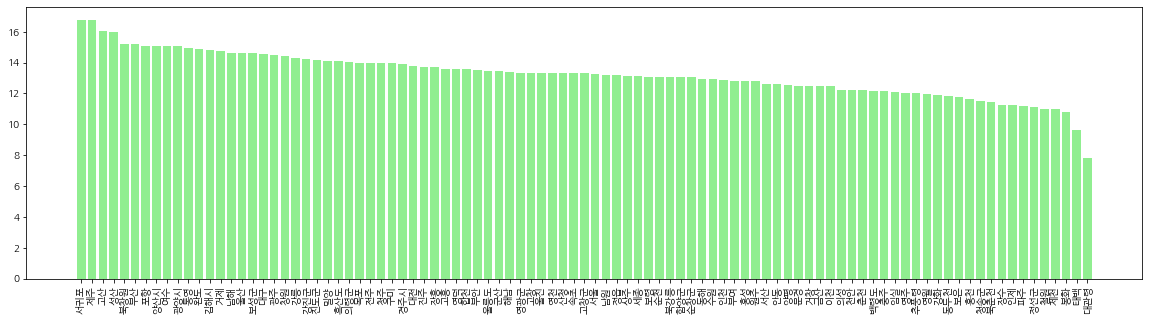

In [34]:
# 지점별 연 평균기온 막대그래프 그리기
plt.figure(figsize=(20,5))
plt.bar(df_2020_mean.index, df_2020_mean, color='lightgreen')
plt.xticks(rotation=90)
plt.show()

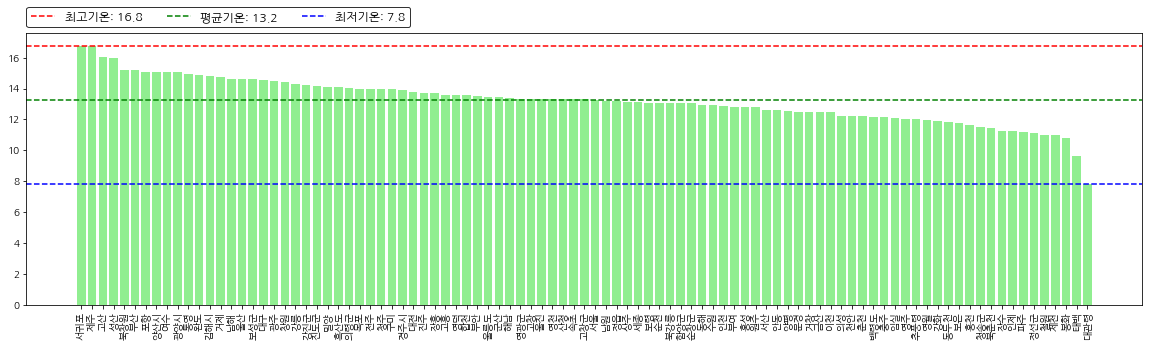

In [41]:
plt.figure(figsize=(20,5))
plt.bar(df_2020_mean.index, df_2020_mean, color='lightgreen')

# 최고, 평균, 최저 수평선 그리기
plt.axhline(df_2020_mean.max(), ls='--', color='r', 
            label='최고기온: '+str(round(df_2020_mean.max(),1)))
plt.axhline(df_2020_mean.mean(), ls='--', color='g', 
            label='평균기온: '+str(round(df_2020_mean.mean(),1)))
plt.axhline(df_2020_mean.min(), ls='--', color='b', 
            label='최저기온: '+str(round(df_2020_mean.min(),1)))
# 수평선 범례
plt.legend(loc=(0,1.02), ncol=3, fontsize=12, edgecolor='k')

plt.xticks(rotation=90)
plt.show()

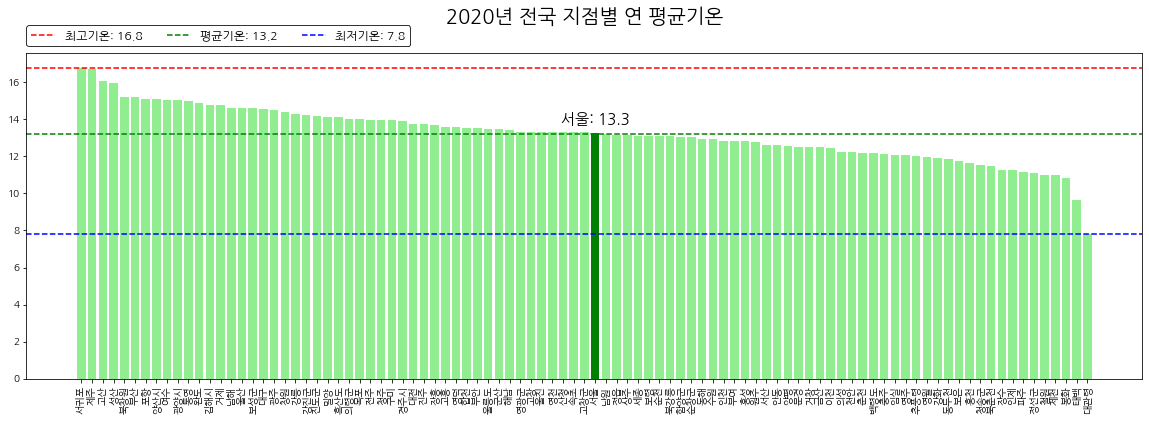

In [46]:
plt.figure(figsize=(20,6))
plt.bar(df_2020_mean.index, df_2020_mean, color='lightgreen')


plt.axhline(df_2020_mean.max(), ls='--', color='r', 
            label='최고기온: '+str(round(df_2020_mean.max(),1)))
plt.axhline(df_2020_mean.mean(), ls='--', color='g', 
            label='평균기온: '+str(round(df_2020_mean.mean(),1)))
plt.axhline(df_2020_mean.min(), ls='--', color='b', 
            label='최저기온: '+str(round(df_2020_mean.min(),1)))

plt.legend(loc=(0,1.02), ncol=3, fontsize=12, edgecolor='k')

plt.xticks(rotation=90)

# 서울지역 표시
plt.bar('서울', df_2020_mean.loc['서울'], color='g')
plt.text('서울', df_2020_mean.loc['서울']+0.5, '서울: '+str(round(df_2020_mean.loc['서울'],1))
        , ha='center', fontsize=15)

# 제목 달기
plt.title('2020년 전국 지점별 연 평균기온', size=20, pad=30)
plt.show()

## 3. 지점별 연 최고,최저 기온 시각화
* 연 최고기온이 높은 지역은 어디일까?
* 연 최저기온이 낮은 지역은 어디일까?
* 서울의 연 최저기온은 전국에서 어느정도 위치일까?

### 3.1. 지점별 연 최저기온

#### 3.1.1. 지점별 연 최저기온 추출

In [48]:
# 지점명으로 그룹핑하여 지점별 연 최저기온 추출
df_2020_cold = df_2020.groupby('지점명')['최저기온(°C)'].min()
df_2020_cold

지점명
강릉    -10.3
강진군    -7.6
강화    -13.6
거제     -5.9
거창    -12.0
       ... 
합천    -10.6
해남    -10.7
홍성    -12.6
홍천    -18.2
흑산도    -3.3
Name: 최저기온(°C), Length: 95, dtype: float64

In [50]:
# 데이터 정렬(내림차)
df_2020_cold = df_2020.groupby('지점명')['최저기온(°C)'].min().sort_values(ascending=False)
df_2020_cold

지점명
제주     -1.4
고산     -1.4
서귀포    -2.1
성산     -2.8
흑산도    -3.3
       ... 
홍천    -18.2
북춘천   -18.5
철원    -18.8
제천    -20.3
대관령   -24.0
Name: 최저기온(°C), Length: 95, dtype: float64

#### 3.1.2. 시각화

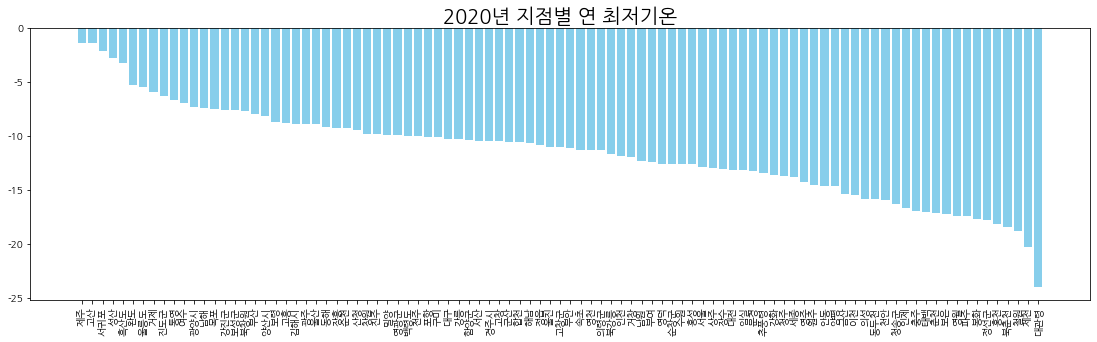

In [55]:
# 지점별 연 최저기온 그래프 그리기
plt.figure(figsize=(19,5))
plt.bar(df_2020_cold.index, df_2020_cold, color='skyblue')

plt.xticks(rotation=90)
plt.title('2020년 지점별 연 최저기온', size=20)

plt.show()

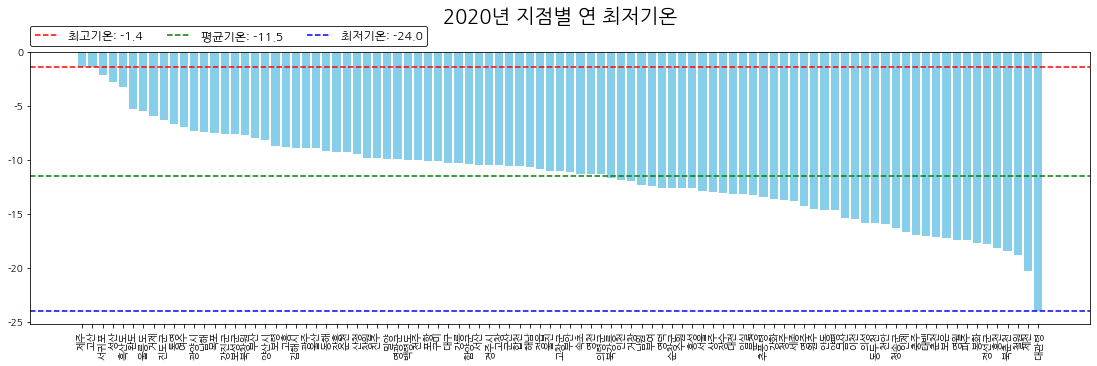

In [61]:
plt.figure(figsize=(19,5))
plt.bar(df_2020_cold.index, df_2020_cold, color='skyblue')

plt.xticks(rotation=90)
plt.title('2020년 지점별 연 최저기온', size=20, pad=30)

# 최저, 평균, 최고 지점 표시
plt.axhline(df_2020_cold.max(), color='r', ls='--', 
            label='최고기온: '+str(round(df_2020_cold.max(),1 )))
plt.axhline(df_2020_cold.mean(), color='g', ls='--', 
            label='평균기온: '+ str(round(df_2020_cold.mean(),1 )))
plt.axhline(df_2020_cold.min(), color='b', ls='--', 
            label='최저기온: '+str(round(df_2020_cold.min(),1 )))

# 범레 표시
plt.legend(loc=(0,1.02), ncol=3, fontsize=12, edgecolor='k')

plt.show()

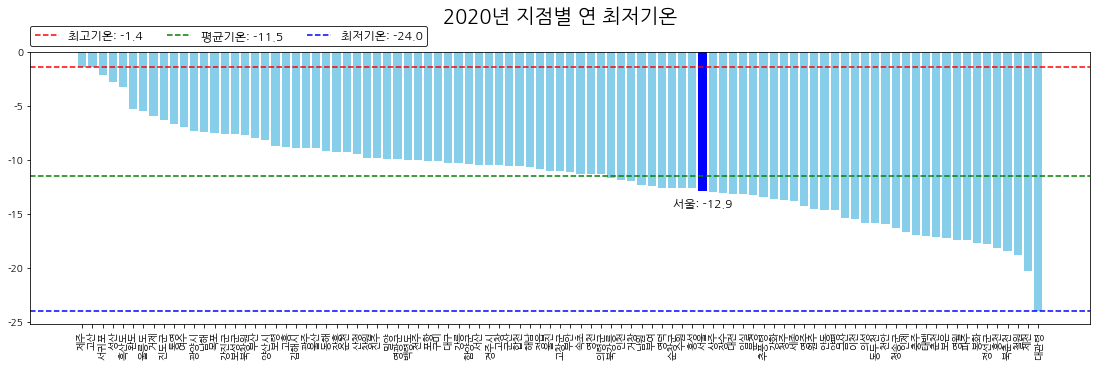

In [60]:
plt.figure(figsize=(19,5))
plt.bar(df_2020_cold.index, df_2020_cold, color='skyblue')

plt.xticks(rotation=90)
plt.title('2020년 지점별 연 최저기온', size=20, pad=30)

plt.axhline(df_2020_cold.max(), color='r', ls='--', 
            label='최고기온: '+str(round(df_2020_cold.max(),1 )))
plt.axhline(df_2020_cold.mean(), color='g', ls='--', 
            label='평균기온: '+ str(round(df_2020_cold.mean(),1 )))
plt.axhline(df_2020_cold.min(), color='b', ls='--', 
            label='최저기온: '+str(round(df_2020_cold.min(),1 )))

plt.legend(loc=(0,1.02), ncol=3, fontsize=12, edgecolor='k')

# 서울 표시
plt.bar('서울',df_2020_cold.loc['서울'], color='b')
plt.text('서울',df_2020_cold.loc['서울']-1.5, 
         '서울: '+str(round(df_2020_cold.loc['서울'],1)), 
         ha='center', fontsize=12)

plt.show()

# 서울은 중간보다 낮다.

### 3.2. 지점별 연 최고기온

#### 3.2.1. 지점별 연 최고기온 추출

In [62]:
# 지점명으로 그룹핑하여 지점별 연 최고기온 추출
df_2020_hot = df_2020.groupby('지점명')['최고기온(°C)'].max().sort_values(ascending=False)
df_2020_hot

# 서귀포 - 최저기온은 높고 최고기온은 낮다.

지점명
양산시    37.8
대구     37.0
경주시    36.9
포항     36.9
북창원    36.9
       ... 
여수     32.6
울릉도    32.0
대관령    31.6
서귀포    31.3
백령도    30.5
Name: 최고기온(°C), Length: 95, dtype: float64

#### 3.2.2. 시각화

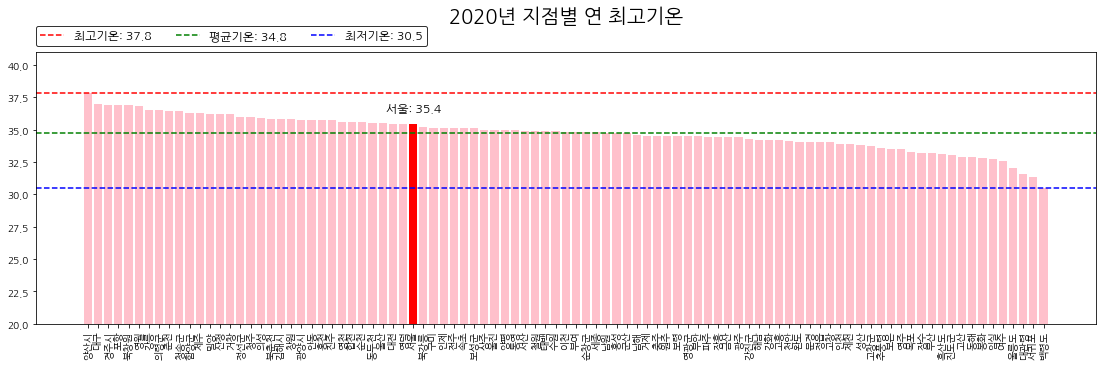

In [71]:
# 지점별 연 최고기온
plt.figure(figsize=(19,5))
plt.bar(df_2020_hot.index, df_2020_hot, color='pink')

plt.xticks(rotation=90)
plt.ylim(20,41)
plt.title('2020년 지점별 연 최고기온', size=20, pad=30)

# 최저, 평균, 최고 지점 표시
plt.axhline(df_2020_hot.max(), color='r', ls='--', 
            label='최고기온: '+str(round(df_2020_hot.max(),1 )))
plt.axhline(df_2020_hot.mean(), color='g', ls='--', 
            label='평균기온: '+ str(round(df_2020_hot.mean(),1 )))
plt.axhline(df_2020_hot.min(), color='b', ls='--', 
            label='최저기온: '+str(round(df_2020_hot.min(),1 )))

# 범레표시
plt.legend(loc=(0,1.02), ncol=3, fontsize=12, edgecolor='k')

# 서울 표시
plt.bar('서울',df_2020_hot.loc['서울'], color='r')
plt.text('서울',df_2020_hot.loc['서울']+0.9, 
         '서울: '+str(round(df_2020_hot.loc['서울'],1)), 
         ha='center', fontsize=12)

plt.show()

## 4. 지점별 기온 분포 시각화 - 히스토그램

### 4.1. 서귀포, 서울, 대관령 서브셋 만들기

In [84]:
# 서귀포 서브셋
df_2020_sgp = df_2020[df_2020['지점명']=='서귀포'].copy()
df_2020_sgp

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1417900,189,서귀포,2020-01-01,7.0,4.8,9.6
1417901,189,서귀포,2020-01-02,8.7,5.6,12.7
1417902,189,서귀포,2020-01-03,9.5,6.1,13.4
1417903,189,서귀포,2020-01-04,9.7,6.2,14.0
1417904,189,서귀포,2020-01-05,9.6,6.1,12.8
...,...,...,...,...,...,...
1418261,189,서귀포,2020-12-27,10.9,9.9,11.9
1418262,189,서귀포,2020-12-28,11.7,7.9,15.5
1418263,189,서귀포,2020-12-29,12.5,9.9,15.2
1418264,189,서귀포,2020-12-30,0.7,-2.1,10.0


In [85]:
# 서울 서브셋
df_2020_su = df_2020[df_2020['지점명']=='서울'].copy()
df_2020_su

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1295456,108,서울,2020-01-01,-2.2,-6.5,0.3
1295457,108,서울,2020-01-02,1.0,-0.7,3.8
1295458,108,서울,2020-01-03,-0.1,-3.4,4.6
1295459,108,서울,2020-01-04,1.2,-2.8,6.1
1295460,108,서울,2020-01-05,1.3,-3.2,6.6
...,...,...,...,...,...,...
1295817,108,서울,2020-12-27,5.8,1.4,10.0
1295818,108,서울,2020-12-28,6.7,4.2,11.4
1295819,108,서울,2020-12-29,0.1,-6.2,4.3
1295820,108,서울,2020-12-30,-10.9,-12.9,-6.2


In [86]:
# 대관령 서브셋
df_2020_dgr = df_2020[df_2020['지점명']=='대관령'].copy()
df_2020_dgr

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1273538,100,대관령,2020-01-01,-6.5,-11.5,-2.5
1273539,100,대관령,2020-01-02,-4.4,-9.0,-0.4
1273540,100,대관령,2020-01-03,-3.2,-7.4,2.5
1273541,100,대관령,2020-01-04,-4.2,-9.9,1.6
1273542,100,대관령,2020-01-05,-5.5,-14.2,4.6
...,...,...,...,...,...,...
1273899,100,대관령,2020-12-27,-1.1,-4.2,5.3
1273900,100,대관령,2020-12-28,1.0,-4.9,8.0
1273901,100,대관령,2020-12-29,-3.0,-8.0,4.5
1273902,100,대관령,2020-12-30,-14.2,-18.3,-5.4


### 4.2. 서귀포, 서울, 대관령 일 평균기온 히스토그램

In [ ]:
# 공통설정 검색
plt.rcParams

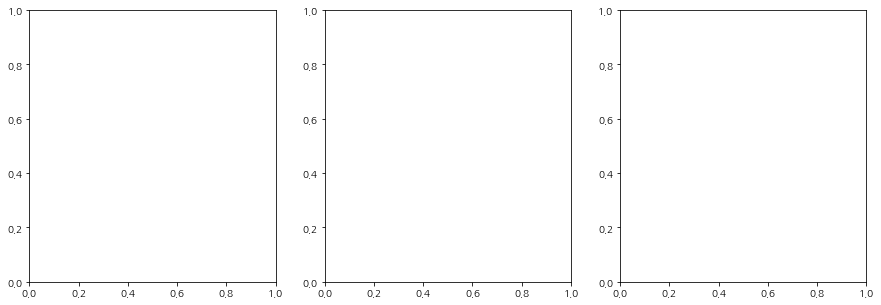

In [82]:
# 서브플롯 그리기
fig, ax = plt.subplots(1,3, figsize=(15,5))

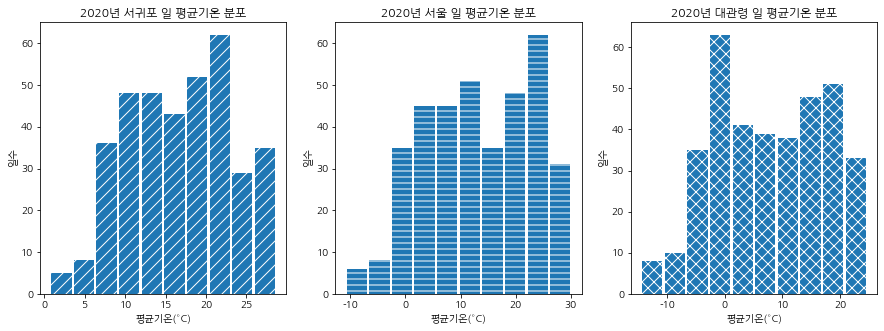

In [95]:
# 스타일 파라미터
plt.rcParams['hatch.color']='w'

fig, ax = plt.subplots(1,3, figsize=(15,5))
# 서귀포 그래프 그리기
ax[0].hist(df_2020_sgp['평균기온(°C)'], rwidth=0.9, hatch='//')
ax[0].set_title('2020년 서귀포 일 평균기온 분포')
ax[0].set_xlabel('평균기온(°C)')
ax[0].set_ylabel('일수')
# 서울 그래프 그리기
ax[1].hist(df_2020_su['평균기온(°C)'], rwidth=0.9, hatch='--')
ax[1].set_title('2020년 서울 일 평균기온 분포')
ax[1].set_xlabel('평균기온(°C)')
ax[1].set_ylabel('일수')
# 대관령 그래프 그리기
ax[2].hist(df_2020_dgr['평균기온(°C)'], rwidth=0.9, hatch='xx')
ax[2].set_title('2020년 대관령 일 평균기온 분포')
ax[2].set_xlabel('평균기온(°C)')
ax[2].set_ylabel('일수')


plt.show()

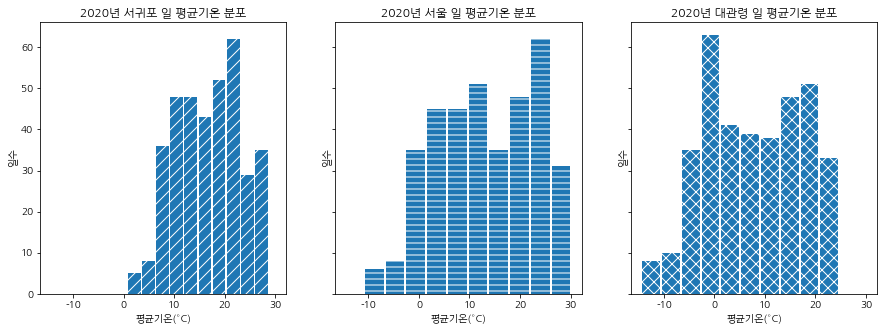

In [97]:
 # 스타일 파라미터
plt.rcParams['hatch.color']='w'
 # x,y 축 통일
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
# 서귀포 그래프 그리기
ax[0].hist(df_2020_sgp['평균기온(°C)'], rwidth=0.9, hatch='//')
ax[0].set_title('2020년 서귀포 일 평균기온 분포')
ax[0].set_xlabel('평균기온(°C)')
ax[0].set_ylabel('일수')
# 서울 그래프 그리기
ax[1].hist(df_2020_su['평균기온(°C)'], rwidth=0.9, hatch='--')
ax[1].set_title('2020년 서울 일 평균기온 분포')
ax[1].set_xlabel('평균기온(°C)')
ax[1].set_ylabel('일수')
# 대관령 그래프 그리기
ax[2].hist(df_2020_dgr['평균기온(°C)'], rwidth=0.9, hatch='xx')
ax[2].set_title('2020년 대관령 일 평균기온 분포')
ax[2].set_xlabel('평균기온(°C)')
ax[2].set_ylabel('일수')


plt.show()

# 서귀포는 다른 지역에 비해 변동 폭이 적다. 

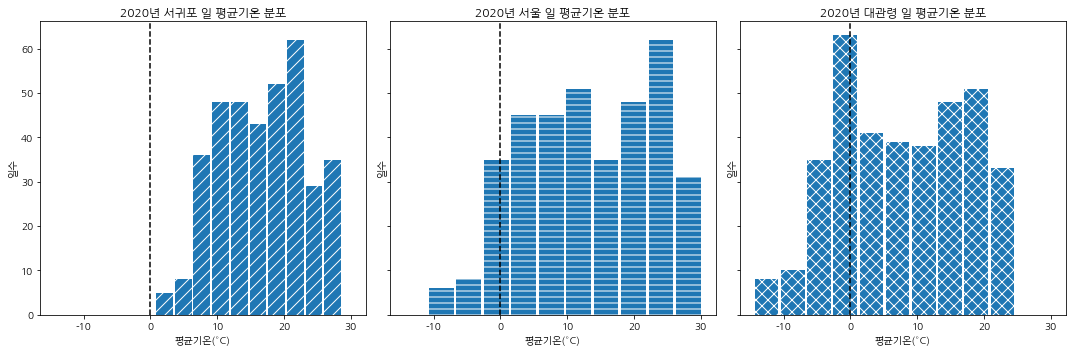

In [101]:
 # 스타일 파라미터
plt.rcParams['hatch.color']='w'
 # x,y 축 통일
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
# 서귀포 그래프 그리기
ax[0].hist(df_2020_sgp['평균기온(°C)'], rwidth=0.9, hatch='//')
ax[0].set_title('2020년 서귀포 일 평균기온 분포')
ax[0].set_xlabel('평균기온(°C)')
ax[0].set_ylabel('일수')
# 서울 그래프 그리기
ax[1].hist(df_2020_su['평균기온(°C)'], rwidth=0.9, hatch='--')
ax[1].set_title('2020년 서울 일 평균기온 분포')
ax[1].set_xlabel('평균기온(°C)')
ax[1].set_ylabel('일수')
# 대관령 그래프 그리기
ax[2].hist(df_2020_dgr['평균기온(°C)'], rwidth=0.9, hatch='xx')
ax[2].set_title('2020년 대관령 일 평균기온 분포')
ax[2].set_xlabel('평균기온(°C)')
ax[2].set_ylabel('일수')

# 0°C 수직선 표시
ax[0].axvline(0,color='k', ls='--')
ax[1].axvline(0,color='k', ls='--')
ax[2].axvline(0,color='k', ls='--')

# 여백 조정
plt.tight_layout()

plt.show()

# 서귀포는 영하인 날씨 없고 30도 이상인 날씨도 없다. 보통 20도 초반
# 서울은 영하 10도까지 떨어졌었다. 보통 20대 중반
# 대관령은 비교적 영하인 날이 많다. 0도 근처인 날이 많다.

## 5. 지점별 기온분포 시각화 - 박스플롯, 바이올린플롯
* 서귀포, 서울, 대관령 지점 2020년 평균기온 서브셋 사용

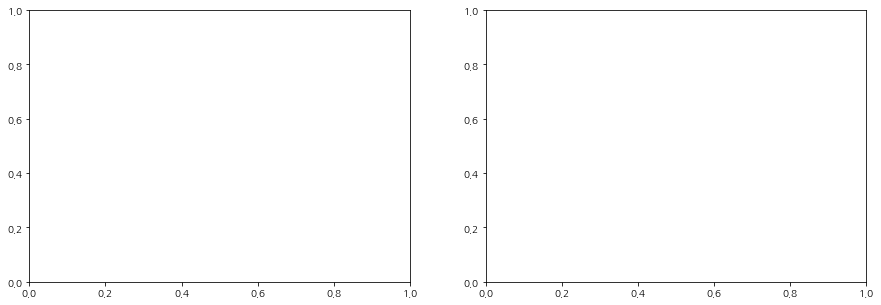

In [103]:
# 서브플롯 그리기
fig = plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

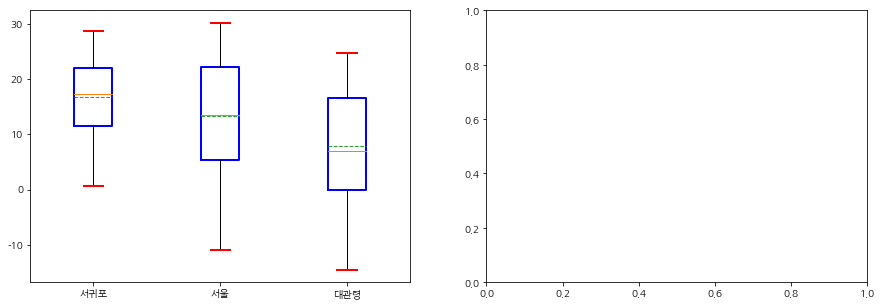

In [120]:
fig = plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

# 박스플롯 스타일 설정
plt.rcParams['boxplot.boxprops.color']='b'
plt.rcParams['boxplot.boxprops.linewidth']='2'
plt.rcParams['boxplot.capprops.color']='r'
plt.rcParams['boxplot.capprops.linewidth']='2'

# 박스플롯 그리기
ax1.boxplot([df_2020_sgp['평균기온(°C)'],
             df_2020_su['평균기온(°C)'],df_2020_dgr['평균기온(°C)']],
            labels=['서귀포','서울','대관령'],
            showmeans=True, meanline=True)

plt.show()

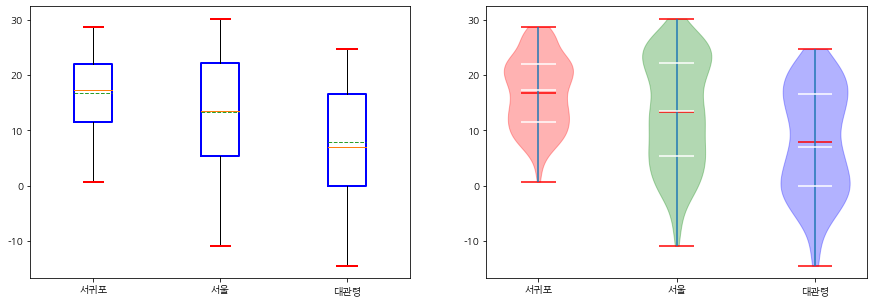

In [117]:
fig = plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

# 박스플롯 스타일 설정
plt.rcParams['boxplot.boxprops.color']='b'
plt.rcParams['boxplot.boxprops.linewidth']='2'
plt.rcParams['boxplot.capprops.color']='r'
plt.rcParams['boxplot.capprops.linewidth']='2'

# 박스플롯 그리기
ax1.boxplot([df_2020_sgp['평균기온(°C)'],
             df_2020_su['평균기온(°C)'],df_2020_dgr['평균기온(°C)']],
            labels=['서귀포','서울','대관령'],
            showmeans=True, meanline=True)



# 바이올린플롯 그리기
v= ax2.violinplot([df_2020_sgp['평균기온(°C)'],
             df_2020_su['평균기온(°C)'],df_2020_dgr['평균기온(°C)']],
             showmeans=True, showmedians=True, 
             quantiles=[[0.25,0.75],[0.25,0.75],[0.25,0.75]])

# 바이올린 플롯 x축 레이블
ax2.set_xticks(range(1,4))
ax2.set_xticklabels(['서귀포','서울','대관령'])

# 바이올린플롯 스타일설정
v['bodies'][0].set_color('r')
v['bodies'][1].set_color('g')
v['bodies'][2].set_color('b')
v['cmeans'].set_edgecolor('r')
v['cmins'].set_edgecolor('r')
v['cmaxes'].set_edgecolor('r')
v['cmedians'].set_edgecolor('w')
v['cquantiles'].set_edgecolor('w')


plt.show()

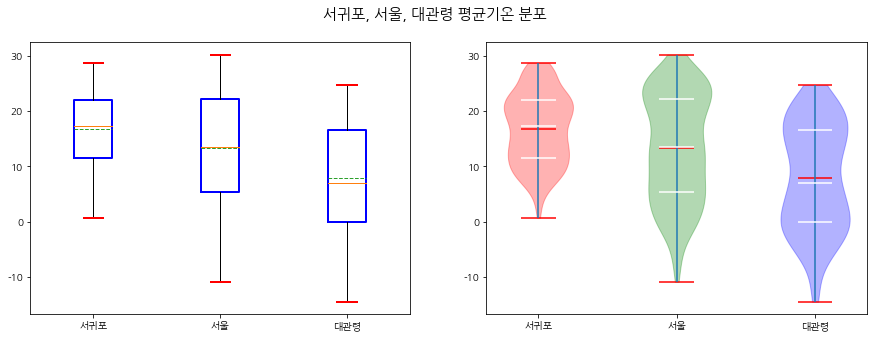

In [119]:
fig = plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

# 박스플롯 스타일 설정
plt.rcParams['boxplot.boxprops.color']='b'
plt.rcParams['boxplot.boxprops.linewidth']='2'
plt.rcParams['boxplot.capprops.color']='r'
plt.rcParams['boxplot.capprops.linewidth']='2'

# 박스플롯 그리기
ax1.boxplot([df_2020_sgp['평균기온(°C)'],
             df_2020_su['평균기온(°C)'],df_2020_dgr['평균기온(°C)']],
            labels=['서귀포','서울','대관령'],
            showmeans=True, meanline=True)



# 바이올린플롯 그리기
v= ax2.violinplot([df_2020_sgp['평균기온(°C)'],
             df_2020_su['평균기온(°C)'],df_2020_dgr['평균기온(°C)']],
             showmeans=True, showmedians=True, 
             quantiles=[[0.25,0.75],[0.25,0.75],[0.25,0.75]])

# 바이올린 플롯 x축 레이블
ax2.set_xticks(range(1,4))
ax2.set_xticklabels(['서귀포','서울','대관령'])

# 바이올린플롯 스타일설정
v['bodies'][0].set_color('r')
v['bodies'][1].set_color('g')
v['bodies'][2].set_color('b')
v['cmeans'].set_edgecolor('r')
v['cmins'].set_edgecolor('r')
v['cmaxes'].set_edgecolor('r')
v['cmedians'].set_edgecolor('w')
v['cquantiles'].set_edgecolor('w')

# 제목
fig.suptitle('서귀포, 서울, 대관령 평균기온 분포',size=15)

plt.show()